## Download GESDISC Data

## Wget

NASA instructions - https://disc.gsfc.nasa.gov/data-access#opendap

wget --load-cookies C:\.urs_cookies --save-cookies C:\.urs_cookies --auth-no-challenge=on --keep-session-cookies --user=Mitchell_Odili --ask-password --content-disposition -i C:\Users\Ochibobo\Arset\subset_OCO2_L2_Lite_FP_10r_20220814_095923.txt --no-check-certificate

Where the txt file is the downloaded links of list in the same directory as .urc_cookies - https://stackoverflow.com/questions/48743736/how-to-download-data-from-ges-disc-using-wget-for-windows-10

# Reading the Individual files from ALL directories
## Libraries:
### OS
- OS walks over the directories and reads the files individually

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import netCDF4 as nc

import os

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### EXAMPLE:
- READING the files from the following directory
- FOR 2021 datasets

In [26]:
file_path_2021= []

for root, dirs, files in os.walk('C:/Users/Ochibobo/Arset/2021_data'):
    for filename in files:
        print(os.path.join(root, filename))
        
        # Append the files into list
        file_path_2021.append(os.path.join(root, filename))

C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210102_B10206Ar_210922005052s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210103_B10206Ar_210922005524s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210104_B10206Ar_210922005930s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210105_B10206Ar_210922010440s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210106_B10206Ar_210922011147s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210107_B10206Ar_210922011944s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210108_B10206Ar_210922012632s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210109_B10206Ar_210922013418s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210110_B10206Ar_210922014053s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210111_B10206Ar_210922014946s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210112_B10206Ar_210922015621s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210113_B10206Ar_210922020458s.SUB.nc4
C:/U

In [98]:
file_path_2021

['C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210102_B10206Ar_210922005052s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210103_B10206Ar_210922005524s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210104_B10206Ar_210922005930s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210105_B10206Ar_210922010440s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210106_B10206Ar_210922011147s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210107_B10206Ar_210922011944s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210108_B10206Ar_210922012632s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210109_B10206Ar_210922013418s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210110_B10206Ar_210922014053s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210111_B10206Ar_210922014946s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210112_B10206Ar_210922015621s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_d

In [34]:
len(file_path_2021)

354

In [28]:
xco2_2021= []
sounding_id_2021= []

for j in range(0, len(file_path_2021)):
    df= nc.Dataset(file_path_2021[j])
    
    
    # storing on pandas
    
    #df_2020= pd.DataFrame(df, columns=["Xco2"])`````
    xco2_2021.append(df.variables["xco2"][:])
    sounding_id_2021.append(df.variables["sounding_id"][:])

In [29]:
type(file_path_2021)

list

### Class
- Function to READ the variables via NETCDF library
- Reads the FILES inside the dir and create Dataframe

In [99]:
class readFiles:
    
    oco_files=[]
    xco2= []
    sounding_id= []
    quality_flag= []
    latitude= []
    longitude= []
    
    def __init__(self, filePath):
        self.filePath= filePath
        # Total files in the directory
        self.total= filePath
        
        
        # RETRIEVE the files automatically on the constructor
        for j in range(0, len(self.total)):
            self.oco_files= nc.Dataset(self.filePath[j])
            
            # read the variables
            self.xco2.append(self.oco_files.variables["xco2"][:])
            self.sounding_id.append(self.oco_files.variables["sounding_id"][:])
            self.quality_flag.append(self.oco_files.variables["xco2_quality_flag"][:])
            self.latitude.append(self.oco_files.variables["latitude"][:])
            self.longitude.append(self.oco_files.variables["longitude"][:])
    
    # return XCO2
    def get_xco2(self):
        return self.xco2
    
    def get_sounding_id(self):
        return self.sounding_id
    
#     # return qual flag
    def get_quality_flag(self):
        return self.quality_flag
    
    # reutrn lat
    def get_latitude(self):
        return self.latitude
    
    # reutrn lat
    def get_longitude(self):
        return self.longitude

In [1]:
# TEST: CLASS OBJECT to READ FILES
xco2_2021_files= readFiles(file_path_2021);

NameError: name 'readFiles' is not defined

In [65]:
# Get the xco2 var from the OBJECT 

xco2_2021= xco2_2021_files.get_xco2()
qual_flag_2021= xco2_2021_files.get_quality_flag()
sounding_id_2021= xco2_2021_files.get_sounding_id()
latitude_2021= xco2_2021_files.get_latitude()
longitude_2021= xco2_2021_files.get_longitude()

In [66]:
# TOTAL RECORDS: Days
len(xco2_2021)

354

In [67]:
df_2021= pd.DataFrame(xco2_2021[0], columns=["Xco2"])

len(df_2021), len(xco2_2021[1])

(163671, 221386)

In [74]:
len(qual_flag_2021), len(sounding_id_2021), len(latitude_2021), len(longitude_2021)

(0, 354, 354, 354)

In [69]:
# APPENDING the columns

%time
df_2021_comb= pd.DataFrame(columns=["Xco2"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
#for j in range(10):
    
    # FIRST COLdf
    df_2021_comb= df_2021_comb.append(pd.DataFrame(xco2_2021[j], columns=["Xco2"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(qual_flag_2020[j], columns=["quality_flag"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(latitude_2020[j], columns=["latitude"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(longitude_2020[j], columns=["longitude"]))
 #   df_2020_comb= df_2020_comb.append(pd.DataFrame(sounding_id_2020[j], columns=["sounding_id"]))


CPU times: total: 0 ns
Wall time: 0 ns


In [70]:
len(df_2021_comb)

66233785

In [71]:
# # Adding Quality FLAG as new column

# %time
# df_2021_comb_qual= pd.DataFrame(columns=["quality_flag"])
#                                     #, "quality_flag","latitude","longitude","sounding_id"])

# for j in range(len(xco2_2021)):
    
#     # FIRST COL
#     df_2021_comb_qual= df_2021_comb_qual.append(pd.DataFrame(qual_flag_2021[j], columns=["quality_flag"]))
    
# len(df_2021_comb_qual)

In [75]:
# LATITUDE
%time
df_2021_comb_lat= pd.DataFrame(columns=["latitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
    
    # FIRST COL
    df_2021_comb_lat= df_2021_comb_lat.append(pd.DataFrame(latitude_2021[j], columns=["latitude"]))


CPU times: total: 0 ns
Wall time: 0 ns


In [76]:
len(df_2021_comb_lat)

66233785

In [78]:
# Longitude
%time
df_2021_comb_long= pd.DataFrame(columns=["longitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
    
    # FIRST COL
    df_2021_comb_long= df_2021_comb_long.append(pd.DataFrame(longitude_2021[j], columns=["longitude"]))

CPU times: total: 0 ns
Wall time: 1.01 ms


In [79]:
len(df_2021_comb_long)

66233785

### COMBINE all DATAFRAMES
- Variables for new columns: xco2, quality_Flag, Latitude, Longitude

In [81]:
combined_dataframe= pd.concat([df_2021_comb,df_2021_comb_lat, df_2021_comb_long], axis= 1)
combined_dataframe

,Xco2,latitude,longitude
0,409.162201,-83.267166,-117.805283
1,410.364136,-82.825813,-121.764305
2,409.787903,-82.813126,-121.865601
3,415.765320,-82.435822,-124.303398
4,408.379730,-73.979095,-149.366760
...,...,...,...
184510,413.859619,53.989925,-163.954605
184511,416.239746,54.481922,-164.367020
184512,416.527802,54.481411,-164.355148
184513,405.322998,54.515018,-164.368423


In [88]:
rev_dataframe = combined_dataframe[:1000000]

### GOOD XCo2 good quality
- Selection of GOOD quality FLAG for analysis

In [ ]:
# %%time
# xco2_good_quality= combined_dataframe[combined_dataframe["quality_flag"]== 0]
# len(xco2_good_quality)

### XCO2 > 419

In [92]:
rev_dataframe[rev_dataframe['Xco2']>419]

,Xco2,latitude,longitude
6,420.225098,-73.965347,-149.517029
8,421.289185,-73.944885,-149.413666
10,421.695251,-73.948288,-149.540283
3804,419.127014,-33.442410,-169.112457
3810,420.704193,-33.417149,-169.105591
...,...,...,...
93540,419.708893,47.631641,20.047640
93541,419.072662,47.645195,20.051504
93542,419.384521,47.638794,20.062887
93624,419.036652,48.218025,19.798912


## Scatter Plots

Total - Outta memory

In [94]:
# %time
# plt.scatter(x=np.arange(0, len(combined_dataframe)), y= combined_dataframe["Xco2"], c='red', alpha=0.25)
# # plt.axhline(y= 419, color='blue')
# plt.gcf().set_size_inches(8,6);

## Good quality Flag -> 0

In [95]:
# %%time
# plt.scatter(x=np.arange(0, len(xco2_good_quality)), y= xco2_good_quality["Xco2"], c='red', alpha=0.30 )
# plt.axhline(y= 419, color='blue', label= '419 ppm')
# plt.yticks(np.arange(375, 445, 10), fontsize= 20)
# plt.title('2020, OCO-2\n', fontsize= 24)
# plt.legend(loc= 'upper right', prop={'size': 20})
# plt.ylabel('XCO2 (ppm)', fontsize= 24)
# plt.gcf().set_size_inches(10,8);

## Xco2Datapoints that higher than 419

In [96]:
rev_dataframe.head(3)

,Xco2,latitude,longitude
0,409.162201,-83.267166,-117.805283
1,410.364136,-82.825813,-121.764305
2,409.787903,-82.813126,-121.865601


In [ ]:
# xco2_max_419= xco2_good_quality[xco2_good_quality["Xco2"] >419]

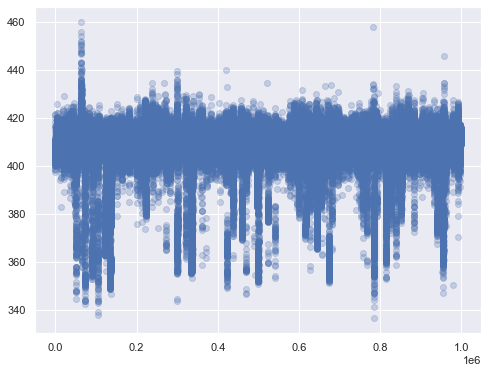

In [97]:
plt.scatter(np.arange(0, len(rev_dataframe)), rev_dataframe["Xco2"], alpha= 0.25)
plt.gcf().set_size_inches(8,6)